# 1. Import Dependencies

In [6]:
import boto3
import pandas

# 2. Connecting to S3 and Retrieving Buckets

In [7]:
# Creating client session
client = boto3.client(
    's3',
    aws_access_key_id = '***',
    aws_secret_access_key = '***',
    region_name = 'us-east-2'
)

In [8]:
# Creating the high level object oriented interface
resource = boto3.resource(
    's3',
    aws_access_key_id = '***',
    aws_secret_access_key = '***',
    region_name = 'us-east-2'
)

In [9]:
clientResponse = client.list_buckets()
for bucket in clientResponse['Buckets']:
    print(bucket)

{'Name': 'python-and-s3', 'CreationDate': datetime.datetime(2021, 9, 8, 19, 7, 33, tzinfo=tzutc())}
{'Name': 'syeds-new-bucket', 'CreationDate': datetime.datetime(2021, 9, 8, 19, 21, 43, tzinfo=tzutc())}


# 3. Reading into Pandas

In [12]:
# Get the bucket object
bucket = client.get_object(
    Bucket = 'python-and-s3',
    Key = 'waterPollution.csv'
)
status = bucket.get("ResponseMetadata", {}).get("HTTPStatusCode")

In [13]:
df = None
if status == 200:
    print(f"Successful S3 get_object response. Status - {status}")
    df = pandas.read_csv(bucket.get("Body"))
    print(df)
else:
    print(f"Unsuccessful S3 get_object response. Status - {status}")

Successful S3 get_object response. Status - 200
      parameterWaterBodyCategory observedPropertyDeterminandCode  \
0                             RW                  CAS_14797-65-0   
1                             RW                  CAS_14797-65-0   
2                             RW                   EEA_3164-07-6   
3                             RW                  CAS_14797-55-8   
4                             RW                   EEA_3151-01-7   
...                          ...                             ...   
19995                         RW                  CAS_14797-65-0   
19996                         RW                   EEA_3131-01-9   
19997                         RW                  CAS_14797-55-8   
19998                         RW                   EEA_3164-08-7   
19999                         RW                   EEA_3152-01-0   

      procedureAnalysedFraction procedureAnalysedMedia    resultUom  \
0                         total                  water    mg{NO2

# 4. Read Data

### 4.1 Clean Data

In [15]:
df.isnull().sum()
df.dropna(inplace=True)

In [16]:
df.head()

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,phenomenonTimeReferenceYear,parameterSamplingPeriod,resultMeanValue,waterBodyIdentifier,Country,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
0,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.063310,FRDR609,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
1,RW,CAS_14797-65-0,total,water,mg{NO2}/L,2009,2009-01--2009-12,0.046733,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
2,RW,EEA_3164-07-6,total,water,{massRatio},2009,2009-01--2009-12,132.859000,FRFR238,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
3,RW,CAS_14797-55-8,total,water,mg{NO3}/L,2009,2009-01--2009-12,11.578376,FRFR327C,France,...,32.0,10.0,3.0,26.0,20.0,9.0,0.0,0.0,0.0,22.26
4,RW,EEA_3151-01-7,total,water,mmol/L,2009,2009-01--2009-12,0.206800,ES014MSPFES-014-NR-038-000-02-02,Spain,...,49.0,8.0,3.0,14.0,15.0,9.0,0.0,2.0,0.0,16.84


### 4.2 Analyze

In [17]:
df.dtypes

parameterWaterBodyCategory                      object
observedPropertyDeterminandCode                 object
procedureAnalysedFraction                       object
procedureAnalysedMedia                          object
resultUom                                       object
phenomenonTimeReferenceYear                      int64
parameterSamplingPeriod                         object
resultMeanValue                                float64
waterBodyIdentifier                             object
Country                                         object
PopulationDensity                              float64
TerraMarineProtected_2016_2018                 float64
TouristMean_1990_2020                          float64
VenueCount                                     float64
netMigration_2011_2018                         float64
droughts_floods_temperature                    float64
literacyRate_2010_2018                         float64
combustibleRenewables_2009_2014                float64
gdp       

In [18]:
df.describe()

,phenomenonTimeReferenceYear,resultMeanValue,PopulationDensity,TerraMarineProtected_2016_2018,TouristMean_1990_2020,VenueCount,netMigration_2011_2018,droughts_floods_temperature,literacyRate_2010_2018,combustibleRenewables_2009_2014,...,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,waste_treatment_recycling_percent
count,19893.000000,19893.000000,19893.000000,19893.000000,1.989300e+04,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,...,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000,19893.000000
mean,2009.004323,34.518266,149.895102,26.227472,4.919348e+07,0.137687,114206.842878,0.130027,14.859312,4.652609,...,32.166075,7.663619,3.196126,23.519892,18.903705,11.206789,0.159449,2.073875,1.302482,23.312787
std,1.919604,174.993151,75.994558,6.790095,2.469506e+07,1.833123,144682.517527,0.260679,31.565912,3.444092,...,11.326430,3.279468,1.130070,6.551350,4.252571,4.901386,0.731725,3.013117,3.656386,5.958540
min,1991.000000,0.000015,14.548292,3.875411,5.300380e+05,0.000000,-83749.750000,0.000000,0.000000,1.064468,...,12.780000,2.200000,1.380000,0.000000,5.000000,1.450000,0.000000,0.000000,0.000000,0.760000
25%,2008.000000,0.114632,122.299437,23.733280,2.586796e+07,0.000000,21256.750000,0.005718,0.000000,4.363288,...,30.000000,5.440000,3.000000,17.700000,18.900000,9.000000,0.000000,0.000000,0.000000,22.260000
50%,2009.000000,2.000000,122.299437,30.831906,5.094169e+07,0.000000,75808.375000,0.005718,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,9.000000,0.000000,0.000000,0.000000,22.260000
75%,2009.000000,11.000000,137.976566,30.831906,7.117635e+07,0.000000,75808.375000,0.032407,0.000000,4.457840,...,32.000000,10.000000,3.000000,26.000000,20.000000,12.400000,0.000000,2.000000,2.700000,27.250000
max,2017.000000,14108.000000,511.475928,38.767234,7.117635e+07,100.000000,582211.000000,0.729194,87.158924,25.982190,...,62.300000,21.400000,9.200000,44.050000,37.830000,22.900000,6.000000,17.210000,30.460000,47.830000


In [19]:
df.describe(include='object')

,parameterWaterBodyCategory,observedPropertyDeterminandCode,procedureAnalysedFraction,procedureAnalysedMedia,resultUom,parameterSamplingPeriod,waterBodyIdentifier,Country
count,19893,19893,19893,19893,19893,19893,19893,19893
unique,3,182,3,2,19,263,2888,26
top,RW,CAS_14797-55-8,total,water,mg{N}/L,2009-01--2009-12,ROSO01,France
freq,19309,1277,19703,19827,3696,9172,56,9661


### 4.3 Get Countries with the Highest Plastic Content

In [21]:
plastic_content = df.sort_values(by=['composition_plastic_percent'])

In [22]:
pc = plastic_content.filter(items=['Country','PopulationDensity','composition_plastic_percent'])
pc.drop_duplicates(subset='Country',keep='first',inplace=True)
pc.tail(15)

,Country,PopulationDensity,composition_plastic_percent
17163,Austria,107.127967,11.10
19864,Italy,205.418372,11.60
18655,Belarus,46.719504,12.00
5743,Poland,124.023482,12.13
12173,Bulgaria,64.711100,12.15
19742,Romania,84.633801,12.33
19880,Ireland,70.653448,12.40
14073,Serbia,79.837686,12.73
2321,Germany,237.307597,13.00
15886,Belgium,377.379590,13.94


# 5. Visualize Data

In [42]:
import seaborn

In [43]:
sns.set_theme()
sns.set()

### Compare the Top and Bottom Plastic Percentage in Water by Country

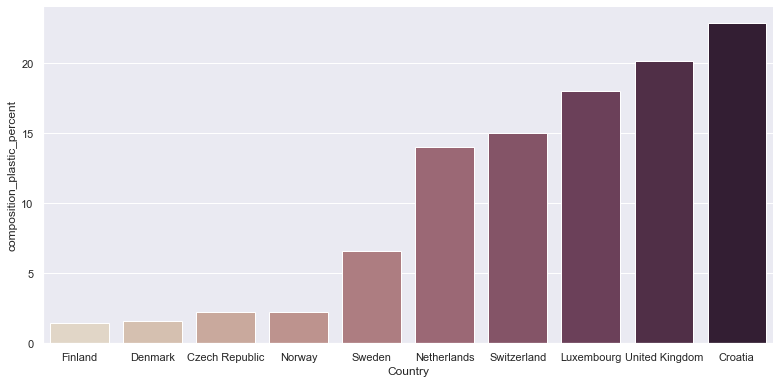

In [59]:
frames = [pc.head(), pc.tail()]
sns.catplot(x = "Country", 
            y = "composition_plastic_percent", 
            kind = "bar",
            palette = "ch:.25", 
            data = pandas.concat(frames),height=5.5, aspect=2)